<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Tue Sep 10 14:30:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   52C    P0             N/A / ERR!  |       0MiB /   4096MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.4.0+cu124


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

1. Automotive
2. Agriculture
3. Sports

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is a common problem in machine learning. its when you have a model that performs well on the training data but poorly on the test data. Or vice versa. or maybe your model structure is not appropriate for the problem you're trying to solve.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Cross-Validation: Partitioning the data into train and test sets. This helps ensure that the model is not overfitting.
2. Regularization: Adding a penalty term to the loss function to prevent overfitting. L1 and L2 regularization are common methods.
3. Early Stopping: Stopping training early if the model is not improving.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

meh

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:41<00:00, 240068.21it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 58779.37it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 247075.59it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
import matplotlib.pyplot as plt

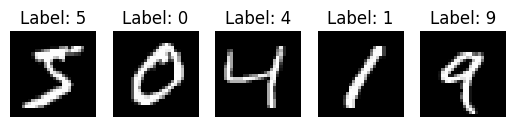

Image Shape: torch.Size([1, 28, 28])


In [11]:
for i in range(5):
    image, label = train_data[i]
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis(False)
    
plt.show()
print(f'Image Shape: {image.shape}')

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x16db0f01930>,
 <torch.utils.data.dataloader.DataLoader at 0x16db0f02e30>)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [122]:
from torch import nn

class MNISTModel(nn.Module):
    def __init__(self, input_features, hidden_units, output_features):
        super().__init__()
        self.cnn_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_features, out_channels=hidden_units, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            # nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3,stride=1, padding=1),
            # nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.cnn_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            # nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            # nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.linear_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_features),
            nn.ReLU(),
        )
        
    def forward(self, x):
        x = self.cnn_block_1(x)
        x = self.cnn_block_2(x)
        # print(f'output of cnn_block_2 shape: {x.shape}')
        x = self.linear_block(x)
        return x

In [123]:
model_1 = MNISTModel(
    input_features=1,
    hidden_units=8,
    output_features=len(class_names)
).to(device)

model_1

MNISTModel(
  (cnn_block_1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_block_2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=392, out_features=10, bias=True)
    (2): ReLU()
  )
)

In [124]:
# create a dummy data to find the flatten layer
dummy_data = torch.randn(size=(1,28,28))
dummy_data.shape

torch.Size([1, 28, 28])

In [125]:
model_1.eval()
with torch.inference_mode():
    print(model_1(dummy_data.unsqueeze(dim=0).to(device)))

tensor([[0.0000, 0.0000, 0.0290, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]], device='cuda:0')


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [126]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

In [127]:
# setup Loss Function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [128]:
from train_test_functions import train_step, test_step
from helper_functions import accuracy_fn
from helper_functions import print_train_time

In [129]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

EPOCHS = 5

train_model_1_start = timer()

for epoch in tqdm(range(EPOCHS)):
    print(f'Epoch : {epoch}')
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_model_1_end = timer()

total_train_model_1_time = print_train_time(train_model_1_start, train_model_1_end, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0
Train Loss: 2.20155 | Train Acc: 20.11%

Test Loss: 1.42209 | Test Acc: 48.34%

Epoch : 1
Train Loss: 1.30927 | Train Acc: 48.66%

Test Loss: 1.22063 | Test Acc: 50.11%

Epoch : 2
Train Loss: 0.89503 | Train Acc: 64.60%

Test Loss: 0.74369 | Test Acc: 69.84%

Epoch : 3
Train Loss: 0.38278 | Train Acc: 85.65%

Test Loss: 0.31543 | Test Acc: 87.67%

Epoch : 4
Train Loss: 0.32467 | Train Acc: 87.45%

Test Loss: 0.29137 | Test Acc: 88.45%


Train time on cuda: 87.615 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?